# Principal Component Analysis 

We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. 
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1.  
3. Plot the standardized time-series for the same countries as you chose in `Step 1`.  
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. Why does it man if the curve goes up or down? What do negative and positive values mean? 

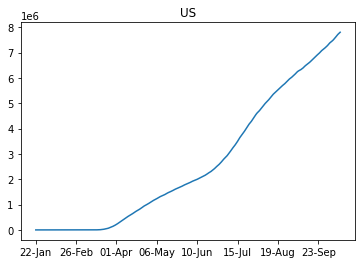

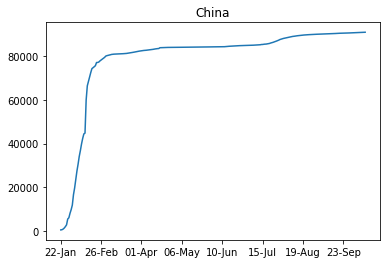

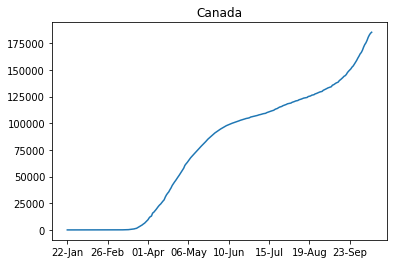

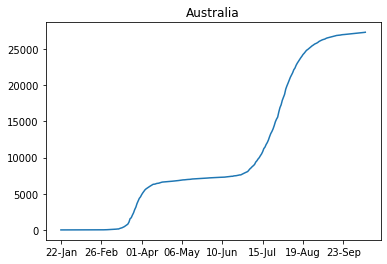

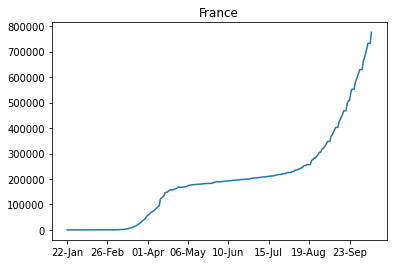

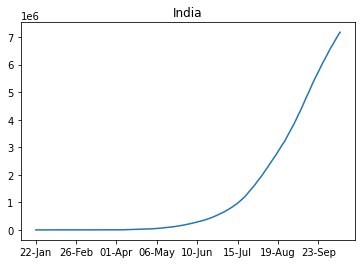

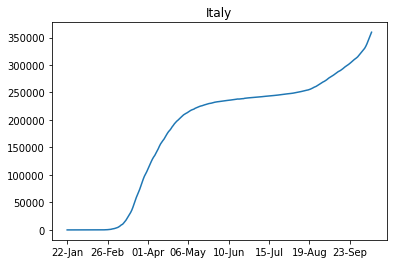

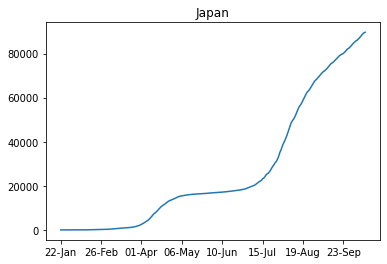

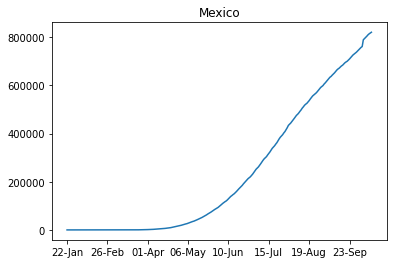

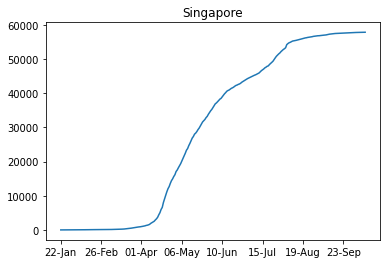

In [ ]:
# 1. Plot the time-series for the US, China, Canada, Australia, France, India, Italy, Japan, Mexico, Singapore
import matplotlib.pyplot as plt
import numpy as np

country = ['US', 'China', 'Canada', 'Australia', 'France', 'India', 'Italy', 'Japan', 'Mexico', 'Singapore']
date = list(cases_raw.columns)

for i in range(len(country)):
  plt.figure()
  plt.title(country[i])
  plt.plot(date,list(cases_raw.loc[country[i]]))
  plt.xticks(np.arange(0, len(date)+1, 35))

In [ ]:
#  2. Apply StandardScalar to the data. Each day should have a mean of zero and a StD of 1.
from sklearn.preprocessing import StandardScaler

cases_std = StandardScaler().fit_transform(cases_raw)
 
# check if each day have a mean of zero and a StD of 1
cases_std[:, 0].mean(), cases_std[:, 0].std()

(4.69935671799008e-18, 1.0000000000000004)

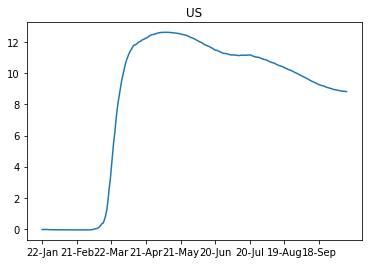

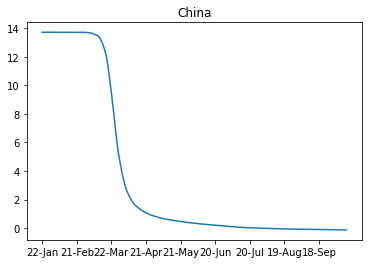

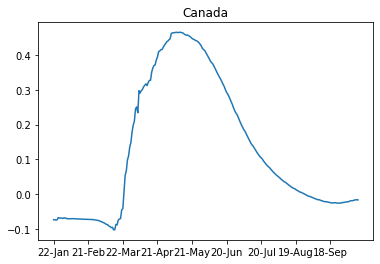

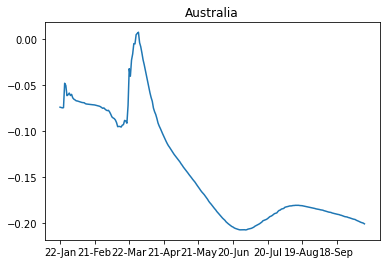

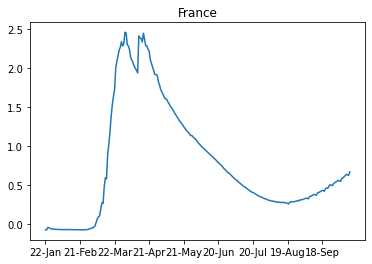

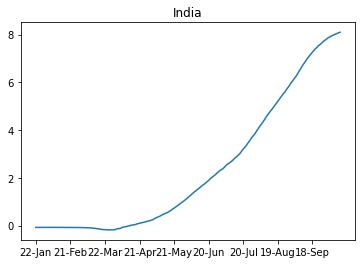

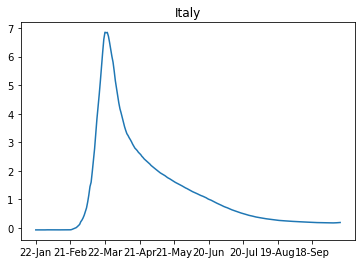

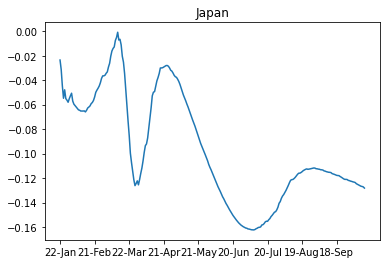

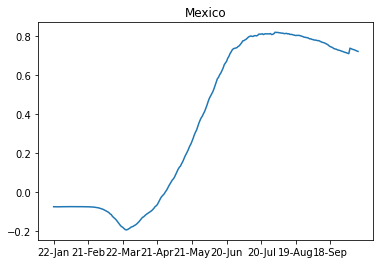

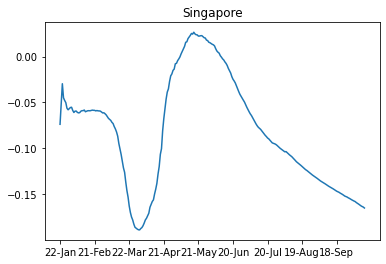

In [ ]:
#  3.Plot the standardized time-series for the same countries as you chose in Step 1. 

cases_std_df = pd.DataFrame(cases_std)
cases_std_df.index = cases_raw.index
cases_std_df.columns = cases_raw.columns

for i in range(len(country)):
  plt.figure()
  plt.title(country[i])
  plt.plot(date, list(cases_std_df.loc[country[i]]))
  plt.xticks(np.arange(0, len(date)+1, 30))
  

In [ ]:
#  Discuss the trends in the standardized time-series for the US, Canada, and China. 
#  Why does it man if the curve goes up or down? What do negative and positive values mean? 

#  Before standardized time-series, the number of total case for the US, Canada, and China is always increasing along with the time.
#  After standardized,  
#  the trend for US remain stable at low value 0 at first, start to rise sharply to 12.5 at beginning of March, but start to drop to 9 at end of April;
#  the trend for China remain stable at high value 13.8 first, start to drop sharply to 2 at end of March, and keep dropping slowly to 0;
#  the trend for Canada remain stable at negative value -0.1 first, start to increase sharply to 0.5 at end of March, but start to drop to 0 at end of April;
 
#  Curve goes up means the situation for that country is getting more serious compare to others,
#  curve goes down means the situation is become better. 

#  Negative values means the number of total cases for that country at the end of that day is below average, 
#  positive values means above average. 


# Part 2: Applying PCA

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265). 
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`.  
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. 
4. How many PCs do you need to cover 99\% of the dataset's variance?  
5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots).  
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend?  

In [ ]:
#  1.Compute the covariance matrix of the dataframe.  

n, m = cases_std.shape
# Compute covariance matrix
C = np.dot(cases_std.T, cases_std) / (n-1) 

# check if dimensions of covariance matrix is (265, 265)
C.shape

(265, 265)

In [ ]:
#  2.Compute eigenvalues and eigenvectors using np.linalg.eigh. [0.5]

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C) 

# sort eigenvalues 
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

Eig Vec:
  [[-5.44783129e-03  1.24541889e-01  3.79748680e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.42558367e-03  1.24541683e-01  3.79902133e-02 ... -1.01020935e-02
   5.94720401e-02 -2.98377995e-02]
 [-5.47420297e-03  1.24547692e-01  3.78644184e-02 ... -9.16715737e-03
  -4.08175495e-02  7.58303486e-03]
 ...
 [-6.72209362e-02 -1.58149961e-02  8.33006433e-02 ...  8.26251408e-03
   4.27225319e-05  1.10861783e-03]
 [-6.71797242e-02 -1.58156089e-02  8.33438265e-02 ... -4.63488489e-04
   6.67246624e-03 -8.68838851e-03]
 [-6.71748520e-02 -1.57812604e-02  8.29795840e-02 ... -1.00950276e-02
  -2.20403562e-02  1.00891006e-02]]  
 Eig Val: 
 [ 1.79910348e+02  6.20997612e+01  1.88571712e+01  3.72685968e+00
  1.36617527e+00  2.51486418e-01  1.23097195e-01  3.69754003e-02
  1.80533491e-02  5.90756588e-03  4.87367574e-03  2.90579815e-03
  1.56039443e-03  1.05257194e-03  6.61275216e-04  5.10878580e-04
  4.88482994e-04  3.64355344e-04  3.15766410e-04  1.94627716e-04
  1.18306706e-

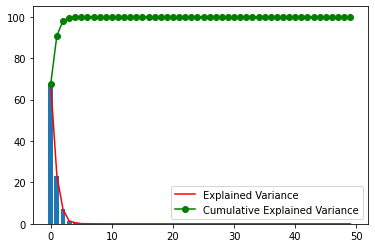

In [ ]:
#  3.Show the effectiveness of your principal components in covering the variance of the dataset with a scree plot. 
 
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

# plot first 50 pca
plt.bar(range(50), expVar[:50])
plt.plot(expVar[:50],'r', label='Explained Variance')

plt.plot(cumExpVar[:50], 'g-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()


In [ ]:
#  4.How many PCs do you need to cover 99% of the dataset's variance?  

for num in list(cumExpVar):
  if num > 99:
     print (list(cumExpVar).index(num))
     break
     
# 4 PCs are needed to cove 99% of the dataset's variance

3


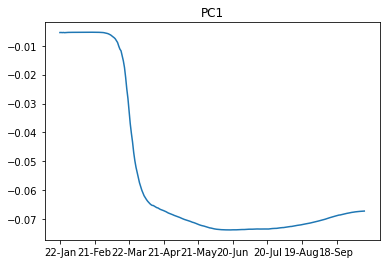

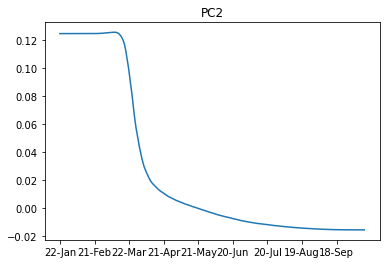

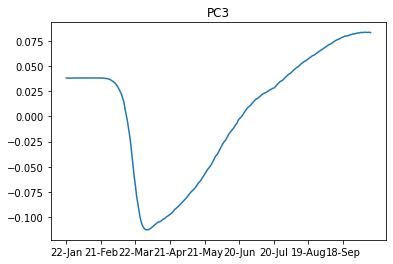

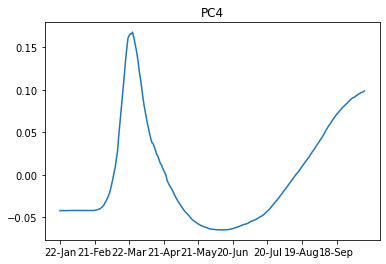

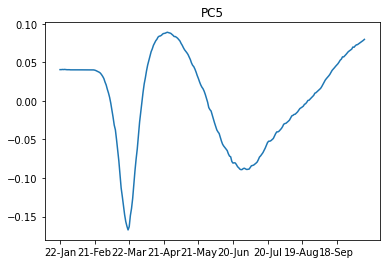

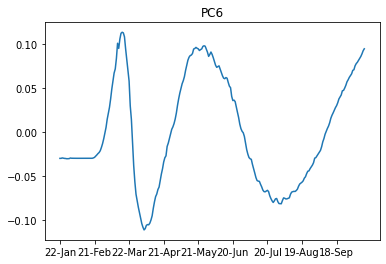

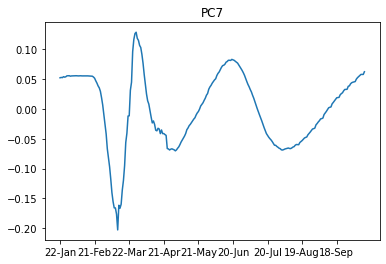

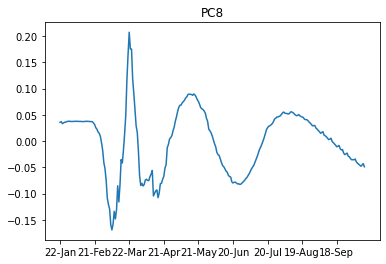

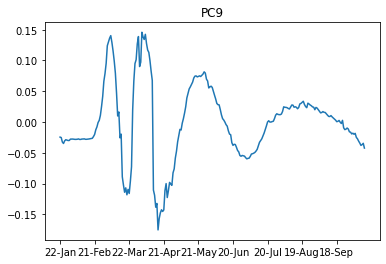

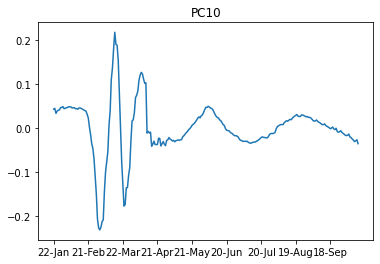

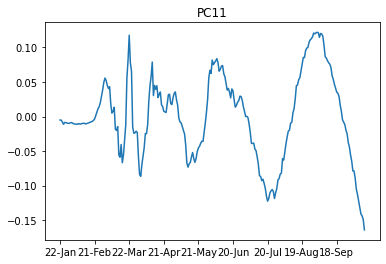

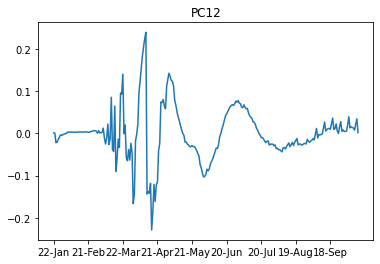

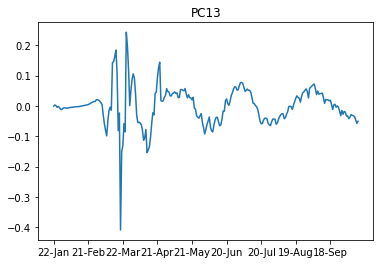

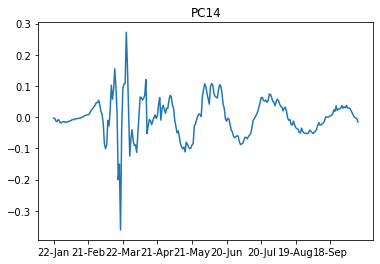

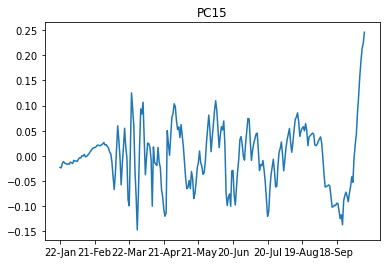

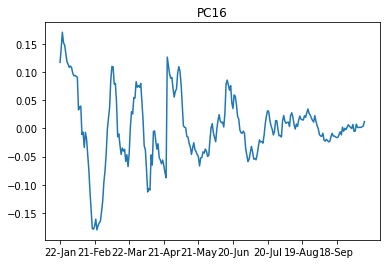

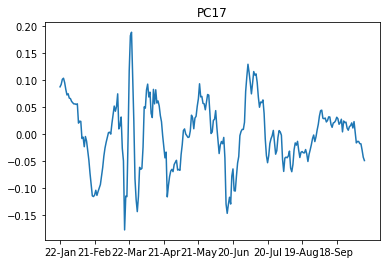

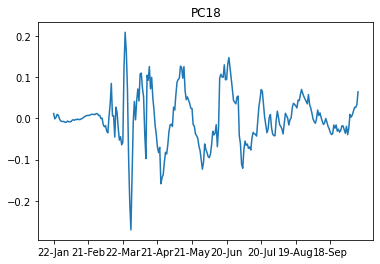

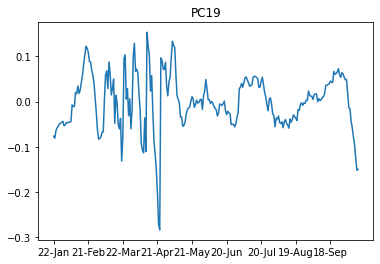

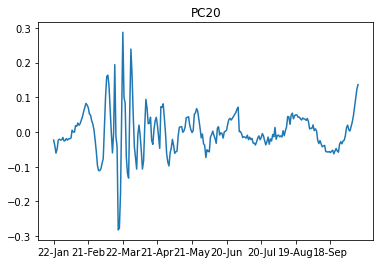

In [ ]:
#  5.Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). [0.5]
 
for i in range(20):
  plt.figure()
  plt.title("PC"+str(i+1))
  plt.plot(date, eigenVectors[:,i])
  plt.xticks(np.arange(0, len(date)+1, 30))


In [ ]:
# Compare the first few PCs with the rest of them. Do you see any difference in their trend? 

# First few PCs fluctuate less frequently compare to the rest of them. I think it's related to the characteristic of 
# PCA, first few PCs contains more useful information to distinguish the data, and data in the eigenvector plots could 
# also be distinguished by their geometric position. 

# Part 3: Data reconstruction 

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country.  
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). 
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components.  

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$.  

Test your function using the `US`, `Canada`, and `China` as inputs. 

In [ ]:
def four_plot(country_name):

  # first plot  
  a = list(cases_std_df.index).index(country_name)
  plt.figure()
  plt.title('standardized time-series')
  plt.plot(date, list(cases_std[a]))
  plt.xticks(np.arange(0, len(date)+1, 30))
  plt.show()
  
  # second plot
  for PC_count in range(10):    
    W = eigenVectors[:, 0:(PC_count+1)] #(265, i)
    projX = np.dot(cases_std, W)  # (189, 265) (265, i) -> (189, i)
    ReconX = np.dot(projX, W.T)  # (189, i) (i, 265) -> (189, 265)

    plt.title('incremental reconstruction of the standardized time-series')
    plt.plot(date, list(ReconX[a]), label=str((PC_count+1)))
    plt.xticks(np.arange(0, len(date)+1, 30))
    plt.legend()
  plt.show()
  
  # third plot 
  for PC_count in range(10):    
    W = eigenVectors[:, 0:(PC_count+1)]  
    projX = np.dot(cases_std, W)   
    ReconX = np.dot(projX, W.T)  

    plt.title('residual error of reconstruction')
    residual_error = (cases_std - ReconX)[a]
    plt.plot(date, list(residual_error), label=str((PC_count+1)))
    plt.xticks(np.arange(0, len(date)+1, 30))
    plt.legend()
  plt.show()

  # forth plot
  RMSE = []
  for PC_count in range(cases_std.shape[1]):    
    W = eigenVectors[:, 0:(PC_count+1)]  
    projX = np.dot(cases_std, W)   
    ReconX = np.dot(projX, W.T)   

    plt.title('RMSE of reconstruction')
    residual_error = (cases_std - ReconX)[a]
    N = cases_std.shape[1]
    RMSE.append (np.sqrt(np.sum(np.square(residual_error))/ N))
  
  plt.plot(np.arange(1, 11),RMSE[0:10])
  plt.show()

  print (RMSE[0:10])
  for num in RMSE:
    if num < 1:
       print (str(RMSE.index(num)+1) + ' PCs are needed so that the RMSE would be less than 1')
       break 

  for num in RMSE:
    if num < 0.1:
       print (str(RMSE.index(num)+1) + ' PCs are needed so that the RMSE would be less than 0.1')
       break
  
  for num in RMSE:
    if num < 0.01:
       print (str(RMSE.index(num)+1) + ' PCs are needed so that the RMSE would be less than 0.01')
       break 

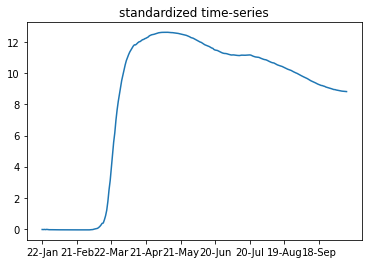

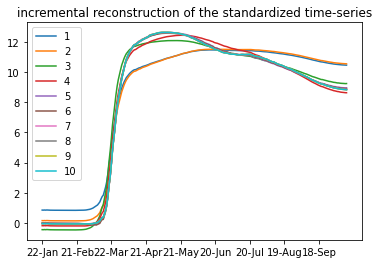

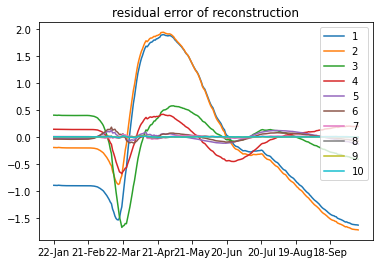

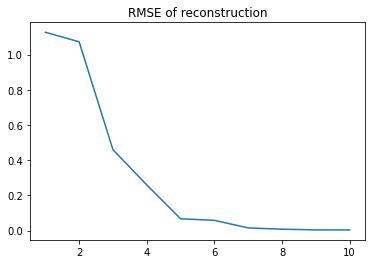

[1.126736565551289, 1.0725059992113866, 0.4595931150409837, 0.2594927781865554, 0.0672128436183069, 0.05827839063149542, 0.015166592769332889, 0.00796489085965393, 0.004066403136955579, 0.0038835828078605966]
3 PCs are needed so that the RMSE would be less than 1
5 PCs are needed so that the RMSE would be less than 0.1
8 PCs are needed so that the RMSE would be less than 0.01


In [ ]:
four_plot('US')

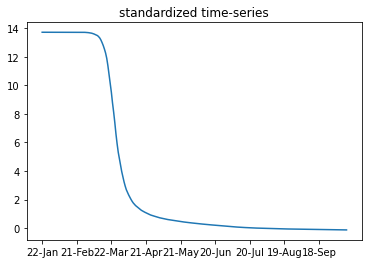

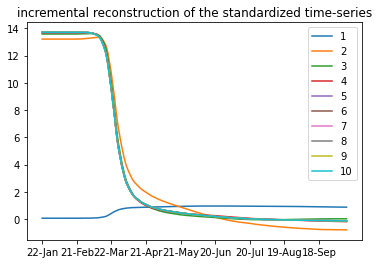

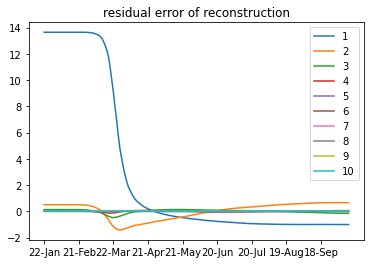

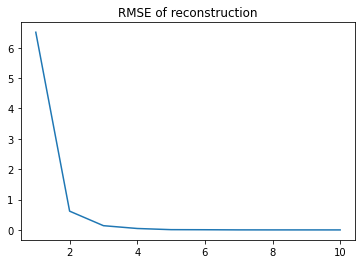

[6.509258206055262, 0.6179869996095877, 0.13966054627260177, 0.04703983231210003, 0.008690094166727702, 0.005949188803413673, 0.0013223456990452645, 0.0005350822413872399, 0.0002811995526760224, 7.393139302574364e-05]
2 PCs are needed so that the RMSE would be less than 1
4 PCs are needed so that the RMSE would be less than 0.1
5 PCs are needed so that the RMSE would be less than 0.01


In [ ]:
four_plot('China')

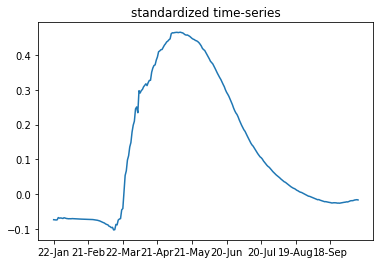

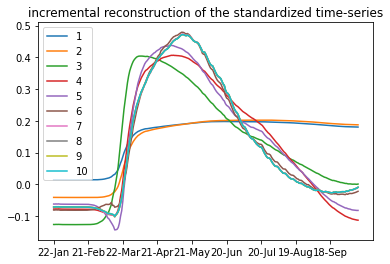

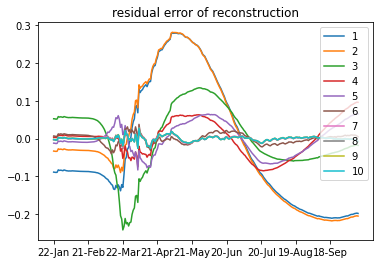

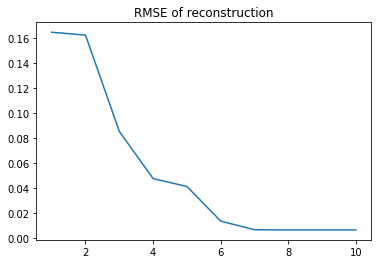

[0.164449408035836, 0.16215375026365994, 0.08519689151834095, 0.0474250912262067, 0.0411124490339606, 0.013403064391547788, 0.00652806217016214, 0.006396034498698087, 0.006395400031062154, 0.006388168251866321]
1 PCs are needed so that the RMSE would be less than 1
3 PCs are needed so that the RMSE would be less than 0.1
7 PCs are needed so that the RMSE would be less than 0.01


In [ ]:
four_plot('Canada')

# Part 4: Time-series analysis on death cases 
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) and prepare the data for calling the Part 3 function 

Test your function with the new dataset, with the `US`, `Canada`, and `China`.  

In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [ ]:
#  First preprocess the data (follow the steps we have in Parts 1 and 2)

#  Apply StandardScalar to the data.
death_std = StandardScaler().fit_transform(death_raw)
 
#  n, m = cases_std.shape
#  Compute covariance matrix
C_death = np.dot(death_std.T, death_std) / (n-1) 

#  Eigen decomposition
eigenValues_death, eigenVectors_death = np.linalg.eigh(C_death) 

# sort eigenvalues 
args = (-eigenValues_death).argsort()
eigenValues_death = eigenValues_death[args]
eigenVectors_death = eigenVectors_death[:, args]


In [ ]:
# prepare the data for calling the Part 3 function
# overwrite the dataset that this function is using

cases_std = death_std
eigenVectors = eigenVectors_death
eigenValues = eigenValues_death 

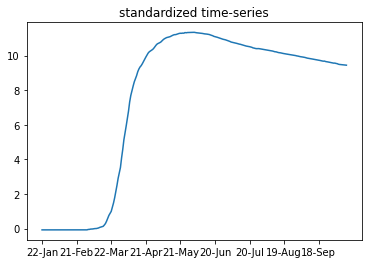

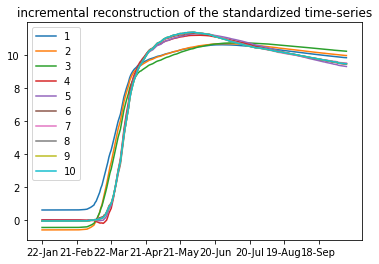

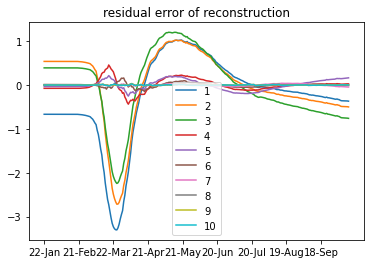

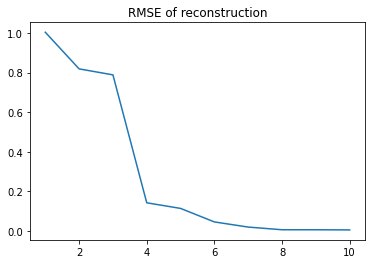

[1.0034300585617921, 0.8186059694564594, 0.7883748760077323, 0.14300204861430282, 0.11459142825948775, 0.04647538027743008, 0.02044378140693566, 0.0069776572651228065, 0.006923797365579057, 0.006128358872796305]
2 PCs are needed so that the RMSE would be less than 1
6 PCs are needed so that the RMSE would be less than 0.1
8 PCs are needed so that the RMSE would be less than 0.01


In [ ]:
# Test your function with the new dataset, with the US, Canada, and China
four_plot('US')

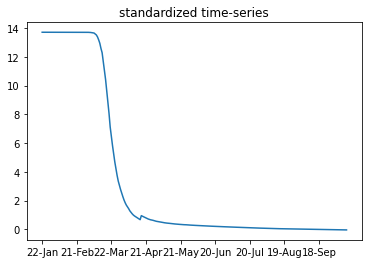

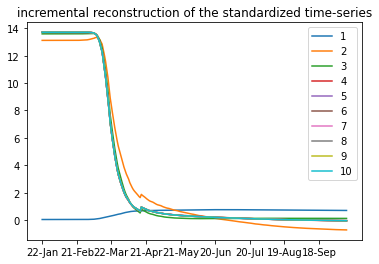

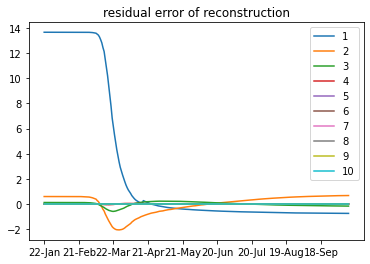

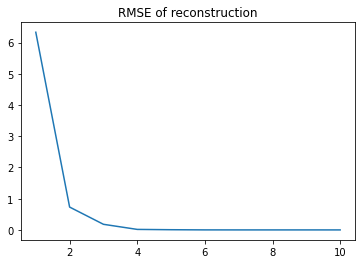

[6.332440607020707, 0.732207298078954, 0.17992580567688377, 0.01644758677073406, 0.006398656931067526, 0.0009807043334809072, 0.00022264529086637972, 0.00022172257583969555, 0.00022021861062794746, 3.240177280768692e-05]
2 PCs are needed so that the RMSE would be less than 1
4 PCs are needed so that the RMSE would be less than 0.1
5 PCs are needed so that the RMSE would be less than 0.01


In [ ]:
four_plot('China')

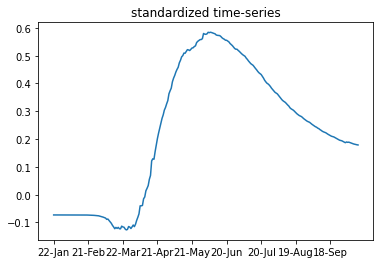

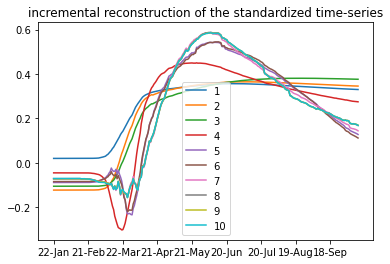

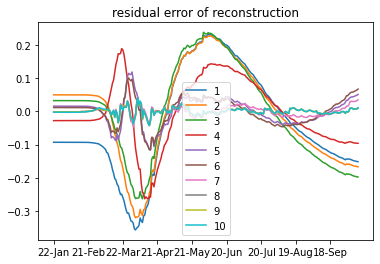

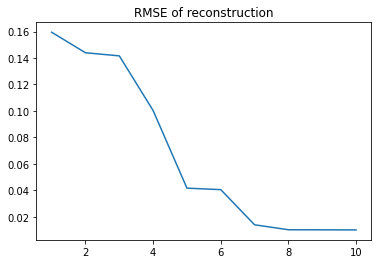

[0.15947167200071363, 0.1439602148747602, 0.14161105218321932, 0.10026619578289006, 0.041591024851014805, 0.040467893538454945, 0.013888636529626148, 0.01013121945492524, 0.01006456572770191, 0.010003188796467418]
1 PCs are needed so that the RMSE would be less than 1
5 PCs are needed so that the RMSE would be less than 0.1
11 PCs are needed so that the RMSE would be less than 0.01


In [ ]:
four_plot('Canada')

# Part 5: MNIST dataset
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.   
* Plot the first 10 eigenvectors. What trends do you observe?  
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.).  
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits.  
* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections*  

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
x.shape

(1000, 784)

Label is: 4


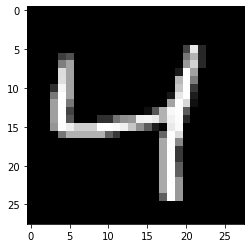

In [ ]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

In [ ]:
#  1.Compute the covariance of the dataframe and perform eigendecomposition.  

n, d = x.shape
mu = x.mean(axis=0)
x_std = x - mu

# covariance matrix
C = np.dot(x_std.T,x_std) 

# eigendecomposition
eigenValues, eigenVectors = np.linalg.eigh(C)

# sort eigenvalues 
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]


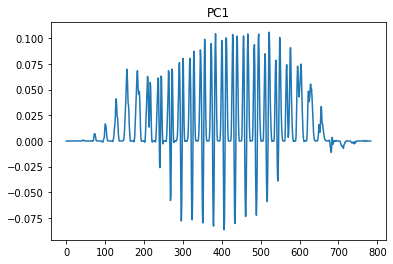

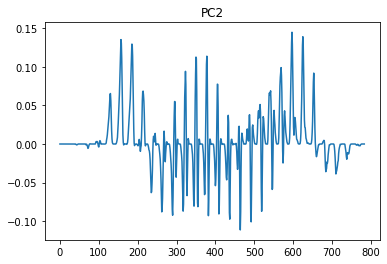

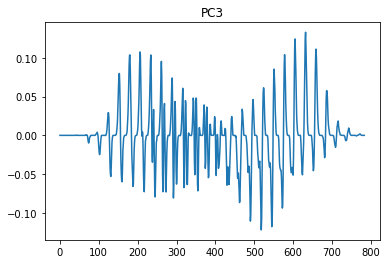

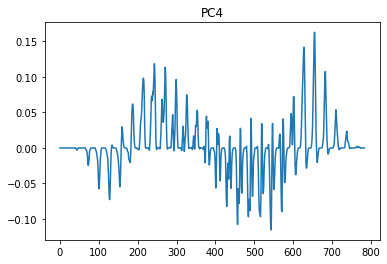

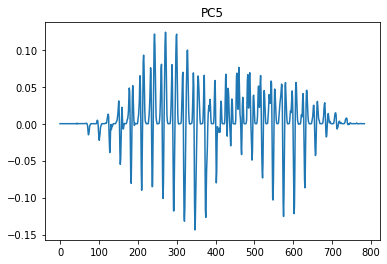

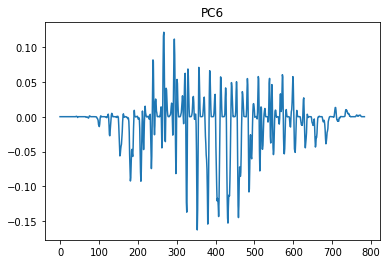

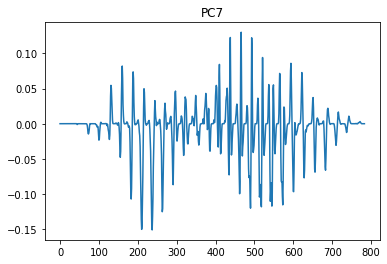

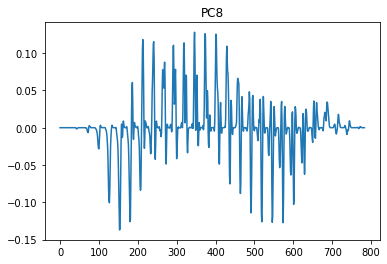

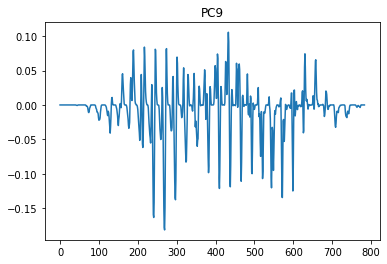

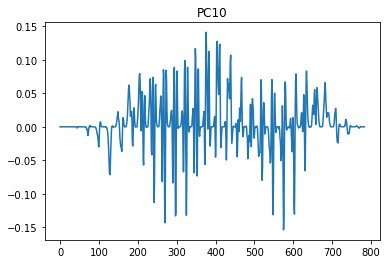

In [ ]:
#  2.Plot the first 10 eigenvectors. What trends do you observe? 

for i in range(10):
  plt.figure()
  plt.title("PC"+str(i+1))
  plt.plot(eigenVectors[:,i])

# The value of first 10 eigenvalue oscillate around 0. Compare to last few eigenvectores, the first few eigenvector oscillate less frequently,
# which means there's less different color compoments, so they're the more important PCs help to identify the digits.


In [ ]:
# 3. Create a function that requires an argument  𝑛  and plots a random image from the dataset, as well as  𝑛  plots of its incremental 
# reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.).
 
from random import randint
import math

# def project (W , X , mu):
#     return np.dot (X - mu , W)

def incremental_recon(n):
  IMAGE_IDX = randint(0, 999) # image idx in dataset

  # actual image
  plt.imshow(x[IMAGE_IDX].reshape(28,28), cmap=plt.cm.gray)
  plt.title('actual image')

  # create reconstructed images
  reconImages = []
  for numEvs in range (1, n+1):
      P = np.dot (x[IMAGE_IDX].reshape(1, -1) - mu , eigenVectors[:, 0:numEvs]) # (1, 784) (784, pcs) -> (1, pcs)
      R = np.dot (P , eigenVectors[:, 0:numEvs].T) + mu  # (1, pcs) (pcs, 784) -> (1,784) - (, 784) = (1,784)

      # reconstruct(eigenVectors[:, 0:numEvs], P, mu)
      reconImages.append(R.reshape(28,28))
   
  # plot reconstructed images
  ROWS = math.ceil(n/3) #2
  fig = plt.figure(figsize=(12, ROWS * 4)) #12,4,12,8
  for i in range(0, n):
      plt.subplot(ROWS, 3, i+1)
      plt.imshow(reconImages[i], cmap = plt.cm.gray)
      plt.title('#{}'.format(i+1))
  

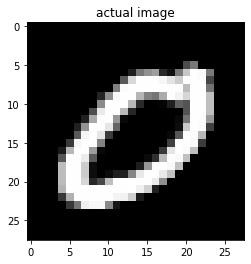

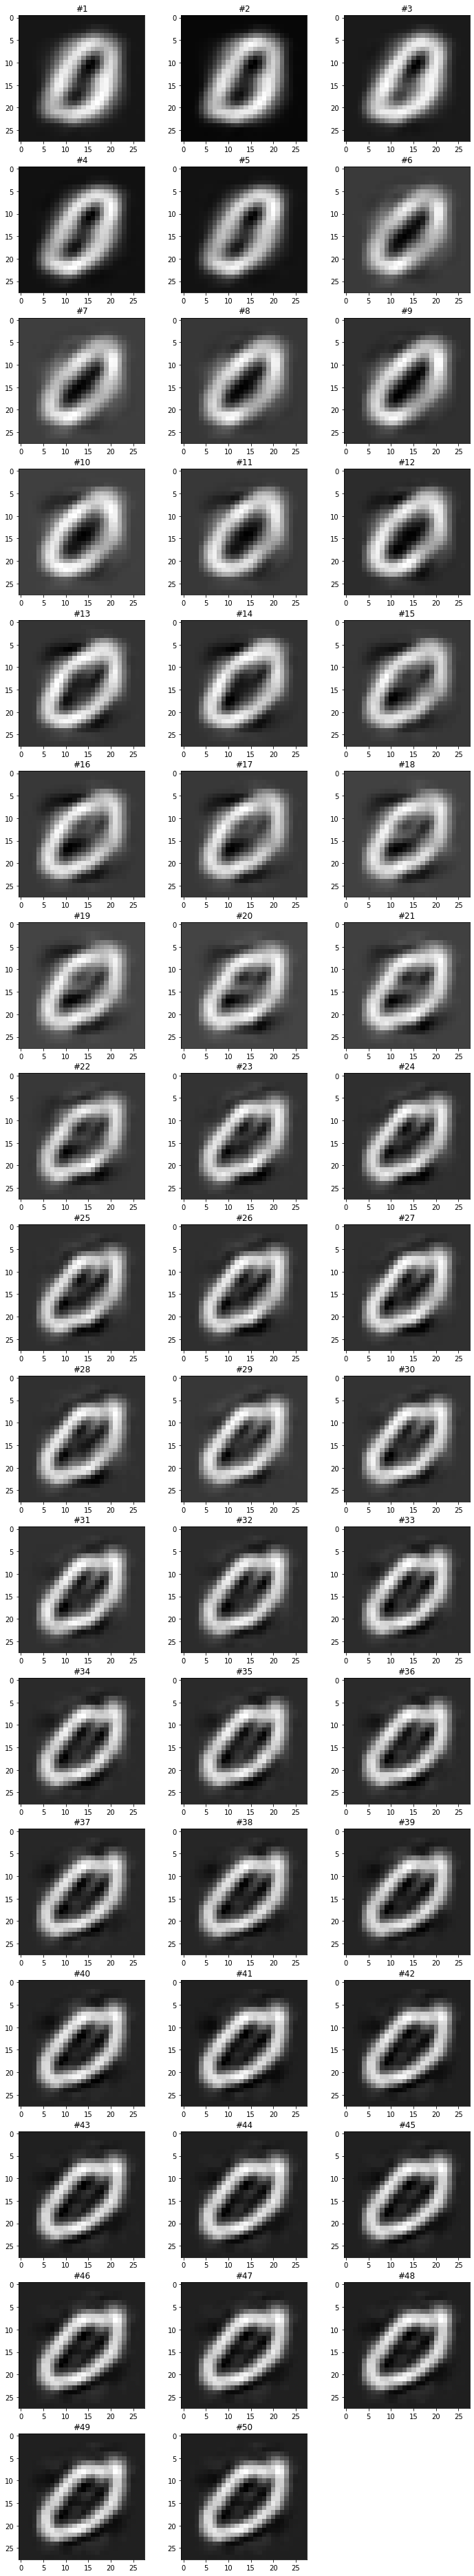

In [ ]:
#  4.Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. [1]

incremental_recon(50)

# 40 components are required roughly to identify the digits


In [ ]:
#  5.With that many components, what would be the compression ratio for a dataset with 1000 images? 
#  Hint: compare the dataset size with a case where we only use principal components and projections  

dataset_size = x.shape[0] * x.shape[1] # (1000, 784)

#  consider 40 components are required
n = 40  
x_op_size = x.shape[1] * n  # (784,40)
projection_size = x.shape[0] * n   # (1000,40)

compression_ratio = dataset_size / (x_op_size + projection_size)
print ('compression ratio = ', compression_ratio)

# the more numbers of components choose, the smaller the compression ratio would be.

compression ratio =  10.986547085201794


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


